# Simulating the superposition of two waves

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cmath

This worksheet you will look at the superposition for two infinite plane waves with the same wavelength and frequency crossing each other at different angles while travelling in the x y plane. First, define the wavelength, `wvl` ($\lambda$), the angles the two propagation vectors make with the x-axis, `theta1` and `theta2` ($\theta_1 \theta_2$) and the amplitudes of the two waves `A1` and `A2` ($E_1 E_2$)

In [9]:
wvl = 0.600
theta1 = 0.1*math.pi
theta2 = -0.1*math.pi
k = 2 * math.pi / wvl
E1 = 1
E2 = 1

Form the wavevectors $k_1$ and $k_2$ you have the angle the vectors make and their magnitude. You will use numpy arrays for the two vectors. 

In [17]:
k1 = np.array([k * math.cos(theta1),k * math.sin(theta1)])
k2 = np.array([k * math.cos(theta2),k * math.sin(theta2)])

We are going to plot the intensities of the resulting waveform over the xy plane so we need a set of x values and y values and also an empty 2D array to hold the results

In [4]:
xs = np.linspace(0,50,500)
ys = np.linspace(-25,25,500)

For each point in the 2D plane you just defined you are going to calculate the sum of the two waves: 

$ E = E_1 e^{i(\vec{k_1} \cdot \vec{r}-\omega t)} + E_2 e^{i( \vec{k_2} \cdot \vec{r} -\omega t)} $

The code below steps over the range of x and y values we just created, calculating the intensity at each point. 

_Note on equations: the intensity formula should be $\frac{1}{2} \varepsilon_0 c EE^{\ast}$ but we are just setting $\frac{1}{2} \varepsilon_0 c= 1$ because we are only interested in relative intensity._

_Note on programming: on the last line we have to take the real part of $zz^{\ast}$. Mathematically this isn't necessary as the result of that product is always real, but python treats the result as a complex number with zero imaginary part and some of the plotting functions don't like that._


In [226]:
def add2planeWaves(k1,k2,x,y):
    intensity = np.empty((x.size,y.size))

    for rx in range(x.size):
        for ry in range(y.size):
            # Make the 'r' vector (this is just a location in space)
            r = np.array([x[rx],y[ry]])
            # Calculate the phase for each wave - note we are setting t=0 so we ignore the time part
            phase1 = k1.dot(r)
            phase2 = k2.dot(r)
            # Create the complex waves
            z1 = cmath.rect(E1,phase1)
            z2 = cmath.rect(E2,phase2)
            # Add the waves
            z = z1 + z2
            # Calculate the intensity and save it for that point
            intensity[rx,ry] = (z * z.conjugate()).real
    
    return intensity

This plots the intensity over the xy plane

In [22]:
intensity = add2planeWaves(k1,k2,xs,ys)

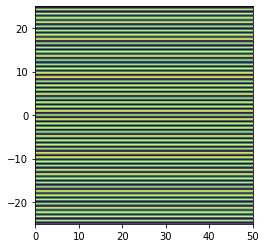

In [23]:
plt.imshow(intensity.T,extent=[0,50,-25,25])
# .T takes the transpose of the array. Necessary as by default imshow would flip the x and y axes

You can also plot a graph of the intensity through a slice in the y direction. Writing `intensity[4]` here takes the 5th x value  of the array and plots it against the y-values

(0, 5)

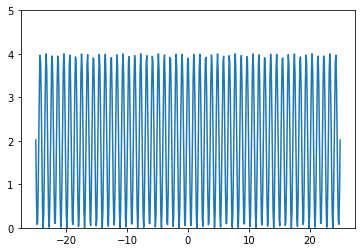

In [24]:
plt.plot(ys,intensity[4])
plt.ylim([0,5])

## Task 1:

Redo the caluclation with different values for the angles of the two k-vectors. Try them at angles which are symmetric about the x axis and asymmetric. Also find out what happens if the two vectors are 180 degrees out from each other. Answer the following questions:
* In what direction do the intensity bands go in relation to the k-vectors?
* What angular difference produces the largest and smallest spatial frequency?
* What effect does changing one of the wave amplitudes have on the intensity profile (check this in the slice plot.
* What is the effect of changing the wavelength?


In [167]:
#180 degrees out
wvl2 = 5
theta3 = 0
theta4 = math.pi 
k2 =2 * math.pi / wvl2
E1 = 1
E2 = 1

In [168]:
k1_2 = np.array([k2 * math.cos(theta3),k2 * math.sin(theta3)])
k2_2 = np.array([k2 * math.cos(theta4),k2 * math.sin(theta4)])

In [169]:
intensity2 = add2planeWaves(k1_2,k2_2,xs,ys)

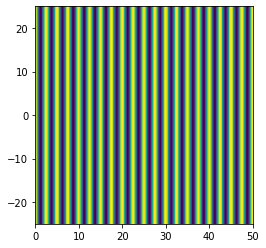

In [171]:
plt.imshow(intensity2.T,extent=[0,50,-25,25])
# .T takes the transpose of the array. Necessary as by default imshow would flip the x and y axes

(0, 5)

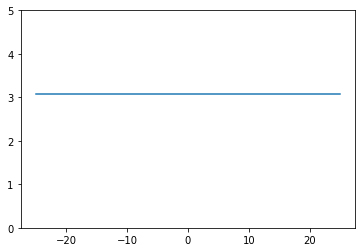

In [172]:
plt.plot(ys,intensity2[4])
plt.ylim([0,5])

The intensity bands travel along the sum of both k vectors

When both vectors are 180 degrees out, they create standing waves as seen above

In [229]:
#vectors are 90 degrees out
wvl3 = 5
theta5 = 0
theta6 = math.pi/2
k3 =2 * math.pi / wvl2
E1 = 1
E2 = 1

In [230]:
k1_3 = np.array([k3 * math.cos(theta5),k3 * math.sin(theta5)])
k2_3 = np.array([k3 * math.cos(theta6),k3 * math.sin(theta6)])

In [231]:
intensity3 = add2planeWaves(k1_3,k2_3,xs,ys)

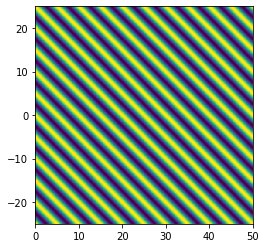

In [232]:
plt.imshow(intensity3.T,extent=[0,50,-25,25])
# .T takes the transpose of the array. Necessary as by default imshow would flip the x and y axes

(0, 5)

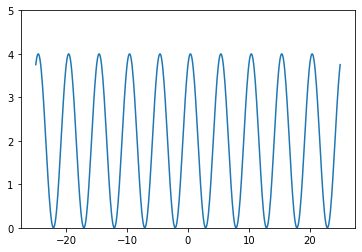

In [233]:
plt.plot(ys,intensity3[4])
plt.ylim([0,5])

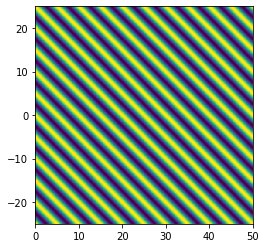

In [236]:
#changing one amplitude
wvl3 = 5
theta5 = 0
theta6 = math.pi/2
k3 =2 * math.pi / wvl2
E1 = 10
E2 = 2

k1_3 = np.array([k3 * math.cos(theta5),k3 * math.sin(theta5)])
k2_3 = np.array([k3 * math.cos(theta6),k3 * math.sin(theta6)])

intensity4 = add2planeWaves(k1_3,k2_3,xs,ys)

plt.imshow(intensity4.T,extent=[0,50,-25,25])
# .T takes the transpose of the array. Necessary as by default imshow would flip the x and y axes

(0, 144)

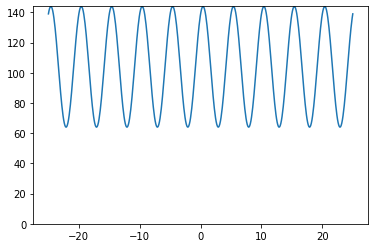

In [239]:
plt.plot(ys,intensity4[4])
plt.ylim([0,144])

when changing one amplitude, the slice plot shows us that the intensity never reaches zero. This is because the addition of vectors will never reach zero in the complex plane no matter thier orientation  

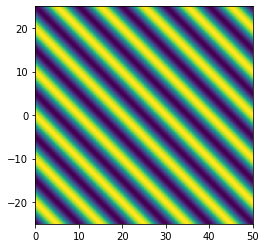

In [244]:
#changing wavelength
wvl3 = 10
theta5 = 0
theta6 = math.pi/2
k4 =2 * math.pi / wvl3
E1 = 1
E2 = 1

k1_4 = np.array([k4 * math.cos(theta5),k4 * math.sin(theta5)])
k2_4 = np.array([k4 * math.cos(theta6),k4 * math.sin(theta6)])

intensity5 = add2planeWaves(k1_3,k2_3,xs,ys)

plt.imshow(intensity5.T,extent=[0,50,-25,25])
# .T takes the transpose of the array. Necessary as by default imshow would flip the x and y axes

(0, 5)

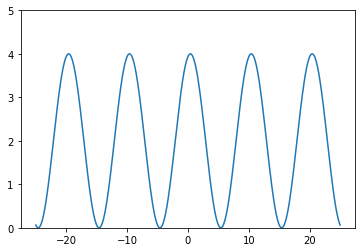

In [246]:
plt.plot(ys,intensity5[4])
plt.ylim([0,5])

By increasing the wavelength, the length of the intensity beams increases. This can be seen above in the slice plot by the increase in wavelength

# Task 2: Spherical waves

What if instead of plane waves we have two spherical waves? Rewrite the plane wave function above to simulate two spherical waves. Spherical waves are given by the equation:

$E = \frac{E_0}{d} e^{i(\vec{k_1} \cdot \vec{r}-\omega t)} $

The difference here is the k-vector is now different for every point as it radiates from a single point. You will need to define a vector for where the source point is for the two waves. Call them `s1` and `s2`. ($\vec{s_1}$ and $\vec{s_2}$).  The k vector will point in the direction from the s-vector to the r vector. So your function will have to calculate the direction of the k-vector for each r point before doing the dot product. 
The other difference is the $d$ is not the actual distance from the source point to the r-point so your function will need to calculate that too.
A final difficulty: you must avoid the singularity! As d goes to zero the amplitude becomes infinite. Even if it's close the size of the amplitude will dwarf the interference pattern. Suggestion: work out d first and if it is more  than say 3 times E_0 just set it to 3 times E_0. 

Try the simulation as before for some different source positions.

In [45]:
wvl = 0.100
s1 = np.array([-150,6])
s2 = np.array([-150,-6])
K = 2 * math.pi / wvl
E1 = 1
E2 = 1

In [10]:
def add2sphericalWaves(K,s1,s2,x,y):
    intensity = np.empty((x.size,y.size))

    for rx in range(x.size):
        for ry in range(y.size):
            # Make the 'r' vector (this is just a location in space)
            r = np.array([x[rx],y[ry]])
            # Calculate the distance from s1 to r 
            d1 = r - s1
            # Calculate the distance from s2 to r
            d2 = r - s2
            # (if d is small set amplitude to high, square it and set the intesity directly)
            D1 = math.sqrt(d1.dot(d1))
            D2 = math.sqrt(d2.dot(d2))
            if D1 < 1:
                D1 = 1
            if D2 < 1:
                D2 = 1
            
            # Calculate the k1 vector
            k1 = K * d1/D1 
            # Calculate the k2 vector
            k2 = K * d2/D2
            # Calculate the phase for each wave - note we are setting t=0 so we ignore the time part
            phase1 = k1.dot(r)
            phase2 = k2.dot(r)
            # Create the complex waves
            z1 = cmath.rect(E1/D1,phase1)
            z2 = cmath.rect(E2/D2,phase2)
            # Add the waves
            z = z1+z2
            # Calculate the intensity and save it for that point
            
            intensity[rx,ry] = (z * z.conjugate()).real
    
    return intensity

In [46]:
intensity = add2sphericalWaves(K,s1,s2,xs,ys)

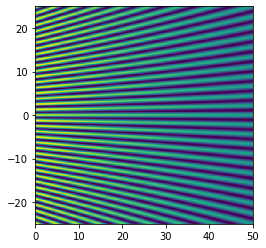

In [47]:
plt.imshow(intensity.T,extent=[0,50,-25,25])

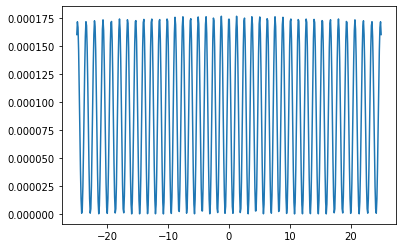

In [48]:
plt.plot(ys,intensity[4])
#plt.ylim([0,0.03])